In [6]:
import json
import os
import shutil

In [13]:
def convert_to_yolo_format(inputs ):
    import os
    def to_yolo(x1, y1, w, h, width_total, height_total):
        x_center = x1 + w/2
        y_center = y1 + h/2

        return [round(x_center/width_total, 2), round(y_center/height_total,2), round(w/width_total, 2), round(h/height_total, 2)]
    # create/move images folder
    folder_ = os.path.split(inputs)[0]
    folder_image = os.path.join(folder_, 'images')
    folder_label = os.path.join(folder_, 'labels')
    if not os.path.exists(folder_image):
        os.makedirs(folder_image)
    if not os.path.exists(folder_label):
        os.makedirs(folder_label)
        
    filenames_jpg = os.listdir(folder_)
    for filename in filenames_jpg:
        if os.path.splitext(filename)[-1] == '.jpg':
            shutil.move( os.path.join(folder_, filename), os.path.join(folder_image, filename))  
    
    data = json.load(open(inputs, 'r'))
    new = {}
    cat = set()
    for item in data['images']:
        id_ = item['id']
        if id_ not in new:
            new[id_] = {'filename':item['file_name'], 'height':item['height'], 'width':item['width'], 'bbxs':[], 'label':[]}

    for item in data['annotations']:
        id_ = item['image_id']
        new[id_]['bbxs'].append(to_yolo(*item['bbox'], new[id_]['width'], new[id_]['height']))
        new[id_]['label'].append(item['category_id'] - 1)
        cat.add(item['category_id'])
        
    for k, item in new.items():
        filename = item['filename'].replace('.jpg', '.txt')
        with open(os.path.join(folder_label, filename), 'w') as f:
            for label, bbx in zip(item['label'], item['bbxs']):
                f.write(f'{label} {bbx[0]} {bbx[1]} {bbx[2]} {bbx[3]}\n')
                        
    print('Conversion Done!')

In [14]:
convert_to_yolo_format(inputs='datasets/bear/train/_annotations.coco.json' )
convert_to_yolo_format(inputs='datasets/bear/valid/_annotations.coco.json' )
convert_to_yolo_format(inputs='datasets/bear/test/_annotations.coco.json')

Conversion Done!
Conversion Done!
Conversion Done!


# Checking conversion

In [16]:
import cv2 
import os 
from matplotlib import pyplot as plt
filename = os.listdir('datasets/bear/test/images')[0]

labels = [x.split() for x in open('datasets/bear/test/labels/'+filename.replace('.jpg', '.txt'), 'r').read().split('\n') if len(x.strip()) > 0 ]

labels= [(label[0], (float(label[1]),float(label[2]), float(label[3]), float(label[4]))) for label in labels]

In [17]:
filename

'000000362363_jpg.rf.cdd9fef304e7839551b78ca6894bef1c.jpg'

In [19]:
image = cv2.imread(f'datasets/bear/test/images/{filename}')

In [20]:
bbx = labels[0][1]
width, height, c = image.shape
print(width, height)
x1, y1, x2, y2 = int((bbx[0] - bbx[2]/2) * width), int((bbx[1] - bbx[3]/2) * height), int((bbx[0] + bbx[2]/2) * width), int((bbx[1] + bbx[3]/2) * height)

640 640


In [21]:
x1, y1, x2, y2

(137, 131, 438, 560)

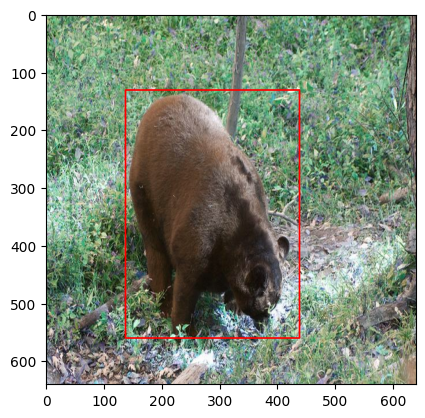

In [22]:
image = cv2.imread(f'datasets/bear/test/images/{filename}')
cv2.rectangle(image, (x1, y1), (x2,y2), (255, 0, 0), 2)
plt.imshow(image)
plt.show()

In [29]:
def to_yolo(x1, y1, w, h, width_total, height_total):
    x_center = x1 + w/2.
    y_center = y1 + h/2.
    print(x_center, y_center)
    return [round(x_center/width_total, 2), round(y_center/height_total, 2), round(w/width_total, 2), round(h/height_total, 2)]
bbx2 = [x1, y1, x2, y2]
to_yolo(*bbx2 , 640, 640)

356.0 411.0


[0.56, 0.64, 0.68, 0.88]

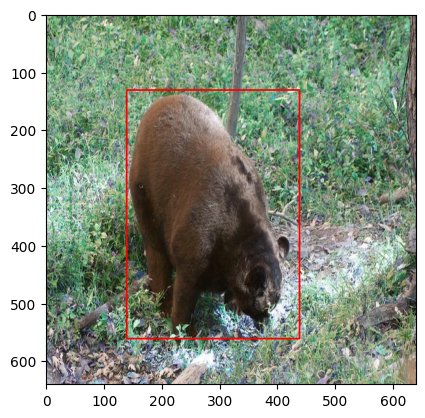

In [30]:
bbx2 = [139, 131, 299, 430]
image = cv2.imread(f'datasets/bear/test/images/{filename}')
cv2.rectangle(image, (bbx2[0], bbx2[1]), (bbx2[0] + bbx2[2], bbx2[1] + bbx2[3]), (255, 0, 0), 2)
plt.imshow(image)
plt.show()